# Global Pollution Data Analysis

In [1]:
#installing libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

# About the data set: 
Aggregate data on solid waste management from around the world. This database features the statistics collected through the effort, covering nearly all countries and over 200 cities. The metrics included cover all steps from the waste management value chain, including waste generation, composition, collection, and disposal. 

Datasource : Kaggle


In [2]:
#Loading data to DataFrame
df = pd.read_csv(r"C:\Users\crama\OneDrive\Desktop\Junior Data Analyst course\Portfolio project\GlobalPollution.csv")

In [59]:
df.head()

,region_id,country_name,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,other_information_information_system_for_solid_waste_management,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_ppp_rules_and_regulations,population_population_number_of_people,special_waste_e_waste_tons_year,special_waste_hazardous_waste_tons_year,total_msw_total_msw_generated_tons_year,waste_treatment_recycling_percent,gdpbins
0,LCN,Aruba,35563.312500,43.2,4.0,3.0,14.00,13.155,11.5,Yes,Yes,Yes,Yes,103187,22500.0,212020.50,8.813202e+04,11.000,Low
1,SAS,Afghanistan,2057.062256,43.2,4.0,3.0,14.00,13.155,11.5,Yes,Yes,Yes,Yes,34656032,20000.0,212020.50,5.628525e+06,13.655,Low
2,SSF,Angola,8036.690430,51.8,6.7,4.4,11.50,11.900,13.5,Yes,Yes,Yes,Yes,25096150,92000.0,212020.50,4.213644e+06,13.655,Low
3,ECS,Albania,13724.058590,51.4,4.5,4.8,15.21,9.900,9.6,No,Yes,Yes,Yes,2854191,20000.0,5714.82,1.087447e+06,13.655,Low
4,ECS,Andorra,43711.800780,31.2,8.2,2.6,11.60,35.100,11.3,Yes,Yes,Yes,Yes,82431,22500.0,1788.00,4.300000e+04,13.655,Mid


In [4]:
#Checking the shape of dataframe
df.shape

(217, 49)

In [97]:
#Checking the data types of dataframe columns
df.columns

Index(['region_id', 'country_name', 'gdp',
       'composition_food_organic_waste_percent', 'composition_glass_percent',
       'composition_metal_percent', 'composition_other_percent',
       'composition_paper_cardboard_percent', 'composition_plastic_percent',
       'other_information_information_system_for_solid_waste_management',
       'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
       'other_information_national_law_governing_solid_waste_management_in_the_country',
       'other_information_ppp_rules_and_regulations',
       'population_population_number_of_people',
       'special_waste_e_waste_tons_year',
       'special_waste_hazardous_waste_tons_year',
       'total_msw_total_msw_generated_tons_year',
       'waste_treatment_recycling_percent', 'gdpbins'],
      dtype='object')

In [6]:
#Checking the duplicate values
df.duplicated().value_counts()

False    217
dtype: int64

In [7]:
#Checking the data summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gdp,217.0,2.254699e+04,2.265798e+04,822.610474,4783.635742,1.320771e+04,3.556331e+04,1.173356e+05
composition_food_organic_waste_percent,176.0,4.173439e+01,1.789823e+01,3.100000,29.225000,4.320000e+01,5.455000e+01,8.760000e+01
composition_glass_percent,171.0,4.756173e+00,3.399614e+00,0.000000,2.805000,4.000000e+00,5.900000e+00,2.140000e+01
composition_metal_percent,170.0,4.276838e+00,3.522976e+00,0.100000,2.000000,3.000000e+00,5.000000e+00,1.938000e+01
composition_other_percent,175.0,1.841801e+01,1.601518e+01,0.800000,9.000000,1.400000e+01,2.235135e+01,9.270000e+01
composition_paper_cardboard_percent,176.0,1.527736e+01,9.478098e+00,2.000000,8.625000,1.315500e+01,2.000000e+01,5.870000e+01
composition_plastic_percent,175.0,1.168739e+01,5.585085e+00,1.000000,7.950000,1.150000e+01,1.455500e+01,3.200000e+01
composition_rubber_leather_percent,53.0,2.671321e+00,2.769187e+00,0.000000,0.900000,1.500000e+00,4.200000e+00,1.260000e+01
composition_wood_percent,64.0,4.772031e+00,6.905955e+00,0.400000,1.000000,2.440000e+00,5.575000e+00,3.820000e+01
composition_yard_garden_green_waste_percent,38.0,1.141994e+01,1.265226e+01,0.930000,2.542500,6.318844e+00,1.516750e+01,6.500000e+01


In [8]:
#Checking null values
df.isnull().sum()

region_id                                                                                  0
country_name                                                                               1
gdp                                                                                        0
composition_food_organic_waste_percent                                                    41
composition_glass_percent                                                                 46
composition_metal_percent                                                                 47
composition_other_percent                                                                 42
composition_paper_cardboard_percent                                                       41
composition_plastic_percent                                                               42
composition_rubber_leather_percent                                                       164
composition_wood_percent                                              

# EDA
Analyzing the data set for understanding the data and getting insights


In [9]:
#Null values handling - removing columns which is having more than 50% null values
for i in df.columns:

    if df[i].isna().sum() > (len(df) / 2):
        del df[i]

df

,region_id,country_name,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,other_information_information_system_for_solid_waste_management,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_ppp_rules_and_regulations,population_population_number_of_people,special_waste_e_waste_tons_year,special_waste_hazardous_waste_tons_year,total_msw_total_msw_generated_tons_year,waste_treatment_recycling_percent
0,LCN,Aruba,35563.312500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,103187,NaN,NaN,8.813202e+04,11.0
1,SAS,Afghanistan,2057.062256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,34656032,20000.0,NaN,5.628525e+06,NaN
2,SSF,Angola,8036.690430,51.800000,6.700000,4.400000,11.500000,11.900000,13.500000,NaN,NaN,Yes,Yes,25096150,92000.0,NaN,4.213644e+06,NaN
3,ECS,Albania,13724.058590,51.400000,4.500000,4.800000,15.210000,9.900000,9.600000,No,Yes,Yes,Yes,2854191,20000.0,5714.82,1.087447e+06,NaN
4,ECS,Andorra,43711.800780,31.200000,8.200000,2.600000,11.600000,35.100000,11.300000,NaN,Yes,Yes,Yes,82431,NaN,1788.00,4.300000e+04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,ECS,Kosovo,9723.561523,42.000000,6.000000,6.000000,20.000000,8.000000,11.000000,Yes,Yes,Yes,Yes,1801800,23.0,495.00,3.190000e+05,NaN
213,MEA,"Yemen, Rep.",8269.671875,65.000000,1.000000,6.000000,6.000000,7.000000,10.000000,No,Yes,Yes,No,27584212,42000.0,21000.00,4.836820e+06,8.0
214,SSF,South Africa,12666.607420,16.381655,5.200216,16.910461,45.020646,9.396918,7.090104,Yes,Yes,Yes,NaN,51729344,321000.0,1319096.00,1.845723e+07,28.0
215,SSF,Zambia,3201.289307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,14264756,15000.0,80000.00,2.608268e+06,NaN


In [10]:
#replacing null values with median and mode values

def mode_imput(i):
    df[i] = df[i].fillna(df[i].mode()[0])
    return df[i]

for i in df.select_dtypes(include = "object").columns:
    mode_imput(i)

def median_imput(i):
    df[i] = df[i].fillna(df[i].median())
    return df[i]

for i in df.select_dtypes(include = "number").columns:
    median_imput(i)

In [11]:
df.isnull().sum()

region_id                                                                         0
country_name                                                                      0
gdp                                                                               0
composition_food_organic_waste_percent                                            0
composition_glass_percent                                                         0
composition_metal_percent                                                         0
composition_other_percent                                                         0
composition_paper_cardboard_percent                                               0
composition_plastic_percent                                                       0
other_information_information_system_for_solid_waste_management                   0
other_information_national_agency_to_enforce_solid_waste_laws_and_regulations     0
other_information_national_law_governing_solid_waste_management_in_the_count

## Finding correlations 

In [12]:
#Correlation in the dataframe
df.corr()

,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,population_population_number_of_people,special_waste_e_waste_tons_year,special_waste_hazardous_waste_tons_year,total_msw_total_msw_generated_tons_year,waste_treatment_recycling_percent
gdp,1.000000,-0.414989,0.199968,0.200397,-0.025269,0.546371,0.058344,-0.060911,0.131925,-0.013853,0.041157,0.469342
composition_food_organic_waste_percent,-0.414989,1.000000,-0.311934,-0.290348,-0.423783,-0.479389,-0.197066,0.092317,-0.028325,-0.038783,0.022499,-0.284057
composition_glass_percent,0.199968,-0.311934,1.000000,0.162807,-0.107657,0.291117,0.122060,-0.067013,0.043112,0.078329,-0.027271,0.038741
composition_metal_percent,0.200397,-0.290348,0.162807,1.000000,-0.098244,0.172515,0.138189,-0.085343,-0.040100,-0.014854,-0.029535,0.272423
composition_other_percent,-0.025269,-0.423783,-0.107657,-0.098244,1.000000,-0.238300,-0.166241,-0.054808,-0.030512,0.014528,-0.071095,0.024593
composition_paper_cardboard_percent,0.546371,-0.479389,0.291117,0.172515,-0.238300,1.000000,0.182368,-0.039760,0.096645,0.095572,0.036718,0.253963
composition_plastic_percent,0.058344,-0.197066,0.122060,0.138189,-0.166241,0.182368,1.000000,-0.038023,0.011820,-0.051137,-0.016381,-0.018287
population_population_number_of_people,-0.060911,0.092317,-0.067013,-0.085343,-0.054808,-0.039760,-0.038023,1.000000,0.715410,0.096230,0.879682,-0.060076
special_waste_e_waste_tons_year,0.131925,-0.028325,0.043112,-0.040100,-0.030512,0.096645,0.011820,0.715410,1.000000,0.137002,0.841274,0.109627
special_waste_hazardous_waste_tons_year,-0.013853,-0.038783,0.078329,-0.014854,0.014528,0.095572,-0.051137,0.096230,0.137002,1.000000,0.134788,-0.069083


In [22]:
#replacing gdp with bins
df['gdpbins'] = pd.cut(df.gdp,bins=3,labels=['Low','Mid','High'])

In [23]:
#Checking the dataframe with gdp bins
df

,region_id,country_name,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,other_information_information_system_for_solid_waste_management,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_ppp_rules_and_regulations,population_population_number_of_people,special_waste_e_waste_tons_year,special_waste_hazardous_waste_tons_year,total_msw_total_msw_generated_tons_year,waste_treatment_recycling_percent,gdpbins
0,LCN,Aruba,35563.312500,43.200000,4.000000,3.000000,14.000000,13.155000,11.500000,Yes,Yes,Yes,Yes,103187,22500.0,212020.50,8.813202e+04,11.000,Low
1,SAS,Afghanistan,2057.062256,43.200000,4.000000,3.000000,14.000000,13.155000,11.500000,Yes,Yes,Yes,Yes,34656032,20000.0,212020.50,5.628525e+06,13.655,Low
2,SSF,Angola,8036.690430,51.800000,6.700000,4.400000,11.500000,11.900000,13.500000,Yes,Yes,Yes,Yes,25096150,92000.0,212020.50,4.213644e+06,13.655,Low
3,ECS,Albania,13724.058590,51.400000,4.500000,4.800000,15.210000,9.900000,9.600000,No,Yes,Yes,Yes,2854191,20000.0,5714.82,1.087447e+06,13.655,Low
4,ECS,Andorra,43711.800780,31.200000,8.200000,2.600000,11.600000,35.100000,11.300000,Yes,Yes,Yes,Yes,82431,22500.0,1788.00,4.300000e+04,13.655,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,ECS,Kosovo,9723.561523,42.000000,6.000000,6.000000,20.000000,8.000000,11.000000,Yes,Yes,Yes,Yes,1801800,23.0,495.00,3.190000e+05,13.655,Low
213,MEA,"Yemen, Rep.",8269.671875,65.000000,1.000000,6.000000,6.000000,7.000000,10.000000,No,Yes,Yes,No,27584212,42000.0,21000.00,4.836820e+06,8.000,Low
214,SSF,South Africa,12666.607420,16.381655,5.200216,16.910461,45.020646,9.396918,7.090104,Yes,Yes,Yes,Yes,51729344,321000.0,1319096.00,1.845723e+07,28.000,Low
215,SSF,Zambia,3201.289307,43.200000,4.000000,3.000000,14.000000,13.155000,11.500000,Yes,Yes,Yes,Yes,14264756,15000.0,80000.00,2.608268e+06,13.655,Low


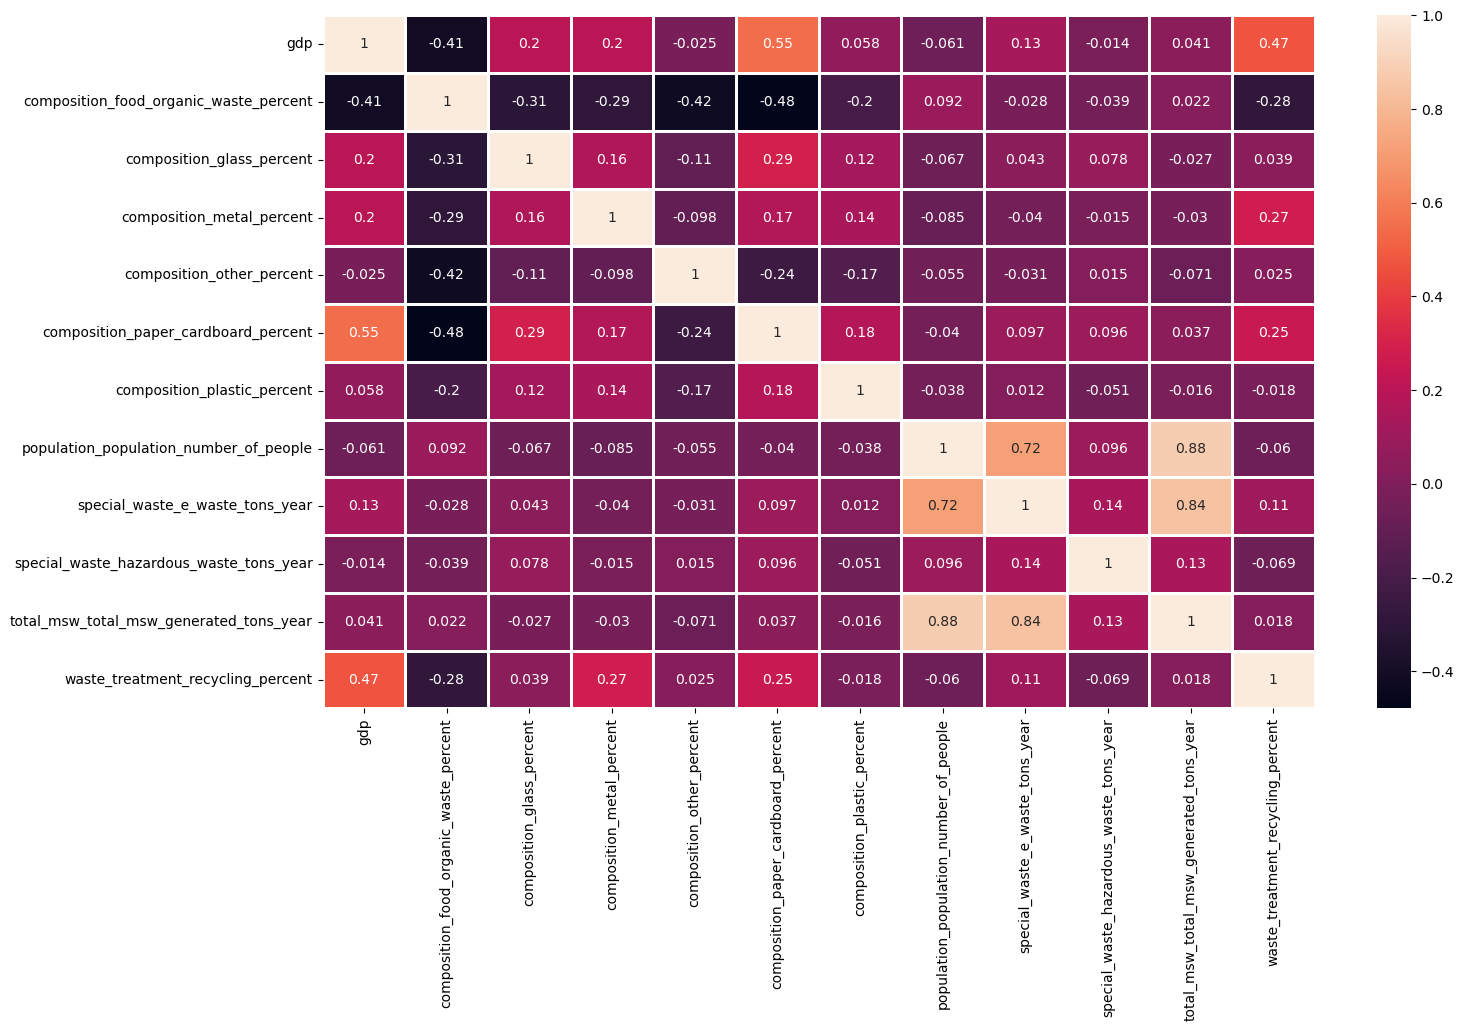

In [24]:
#Plotting heatmap using seaborn lib to visualize the correlation
plt.figure(figsize = (16,9))
sns.heatmap(df.corr(), annot = True, linewidths = 1)
plt.show()

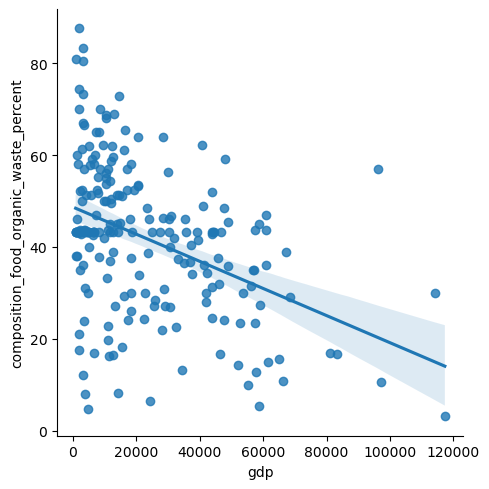

In [27]:
#Relation between gdp and food organic waste percent - Negative correlation

sns.lmplot(x='gdp',y='composition_food_organic_waste_percent',data=df)

plt.show()


There is a negative correlation seen with the gdp and the food waste percent. It says that the developed countries are good at reducing food waste and the countries with low gdp are producing high food waste

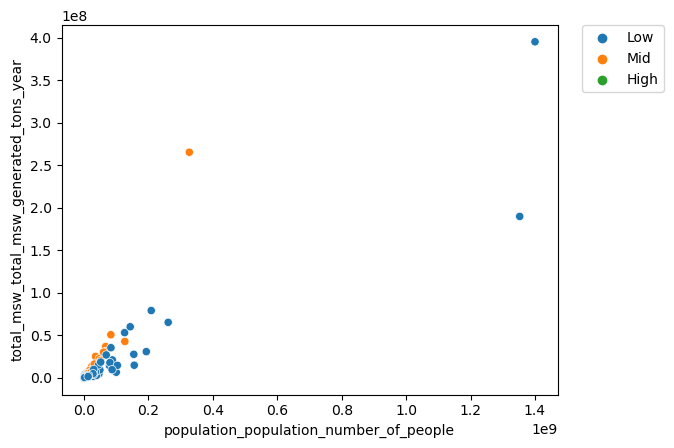

In [62]:
#Relation between population vs E-waste tons generated(Red) and MSW(Green) generated - Positive correlation

sns.scatterplot(x='population_population_number_of_people',
                y='total_msw_total_msw_generated_tons_year',
                data=df,
                markers='o',
                hue='gdpbins')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


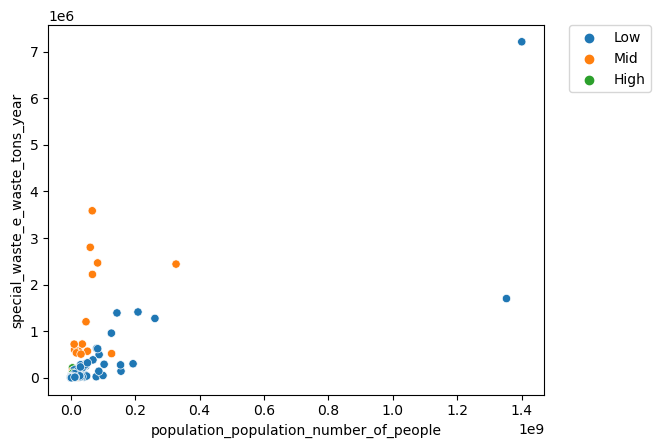

In [47]:
sns.scatterplot(x='population_population_number_of_people',
                y='special_waste_e_waste_tons_year',
                data=df,
                hue='gdpbins')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

There is a positive correlation seen with the population vs the E-waste and the Municipal supply waste generated of the country. It says that the when the population is growing there is an increase in E-waste and MSW , which is to be alerted and to be treated. Let's check the waste treatment of the countries.

# Pairplot is used to identify the correlation between various numeric variables.
Here seaborn pairplot is used.


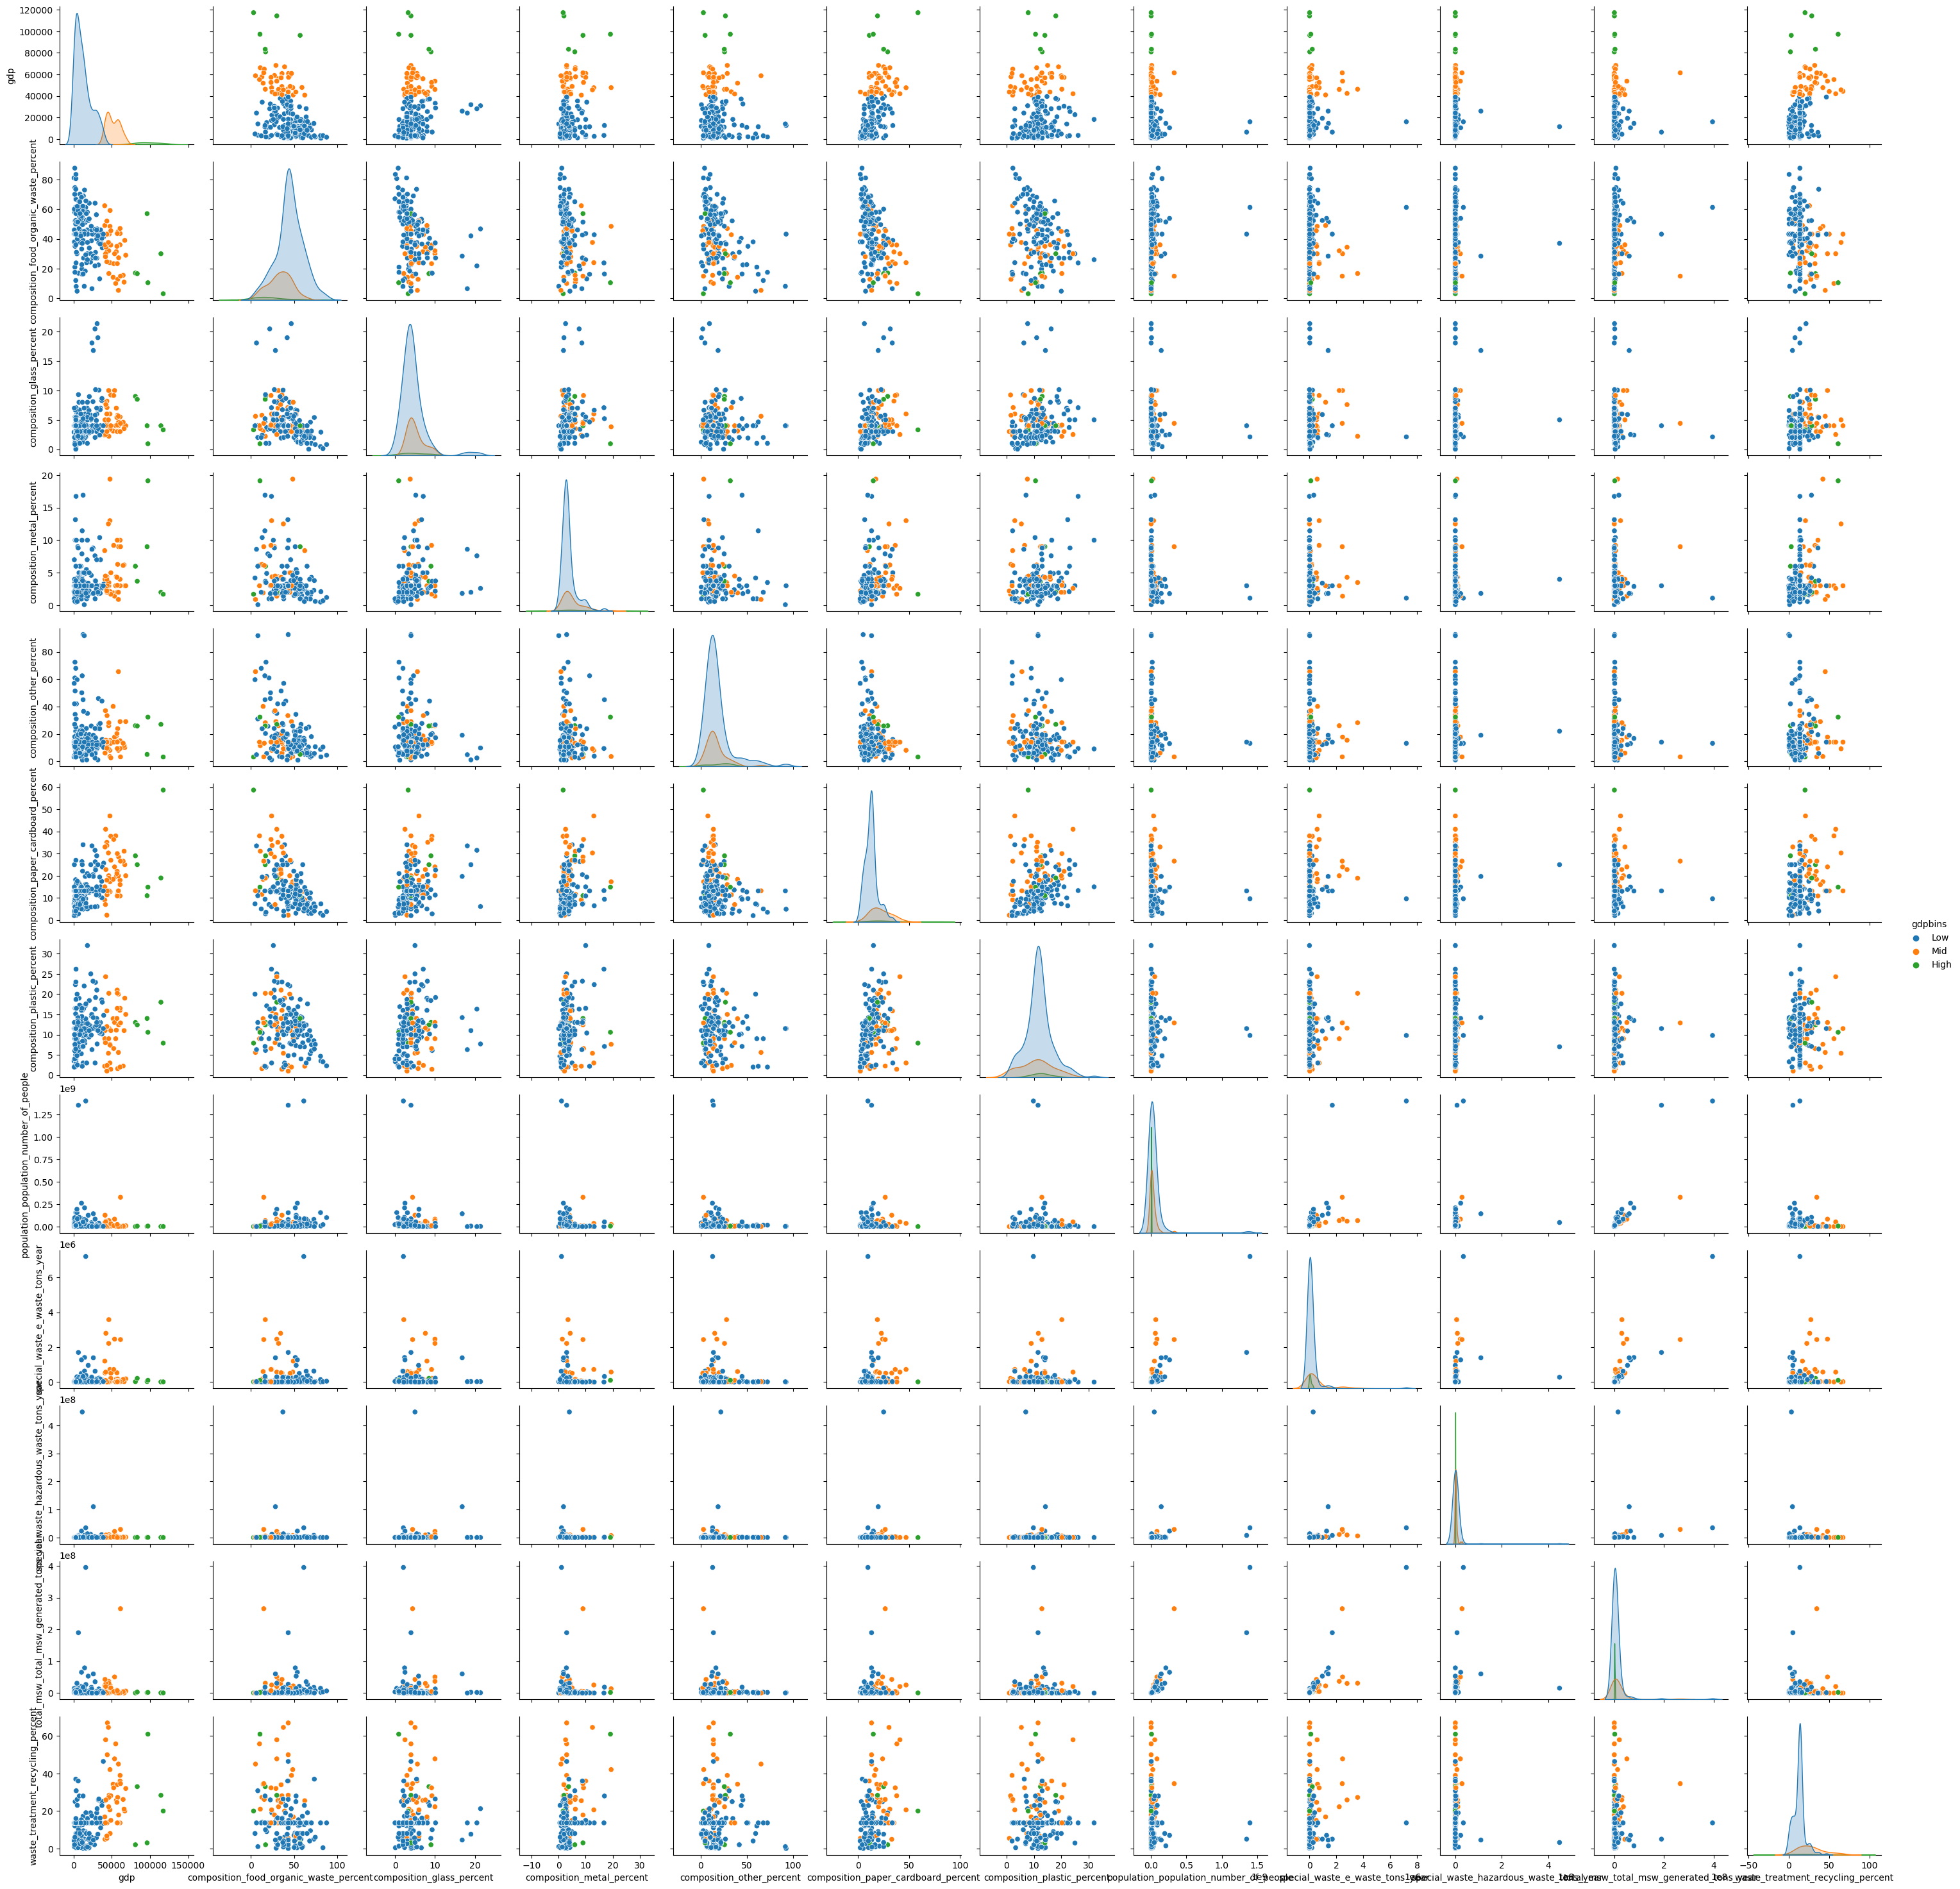

In [44]:
#Using seaborn pairplot to find the correlation of numeric variables in the dataframe
#plt.figure(figsize = (30,40))
sns.pairplot(data=df,hue='gdpbins')
plt.show()

### Findings :
### Positive correlations:
gdp vs waste treatment recycling percentage,
gdp vs composition paper carboard waste,
composition paper carboard waste vs composition plastic waste,
gdp vs composition glass percent,
gdp vs composition metal percent,
composition plastic waste vs composition glass percent,

### Negative correlations :
gdp vs composition food organic waste,
composition paper carboard waste vs composition other waste,
composition plastic waste vs composition food organic waste

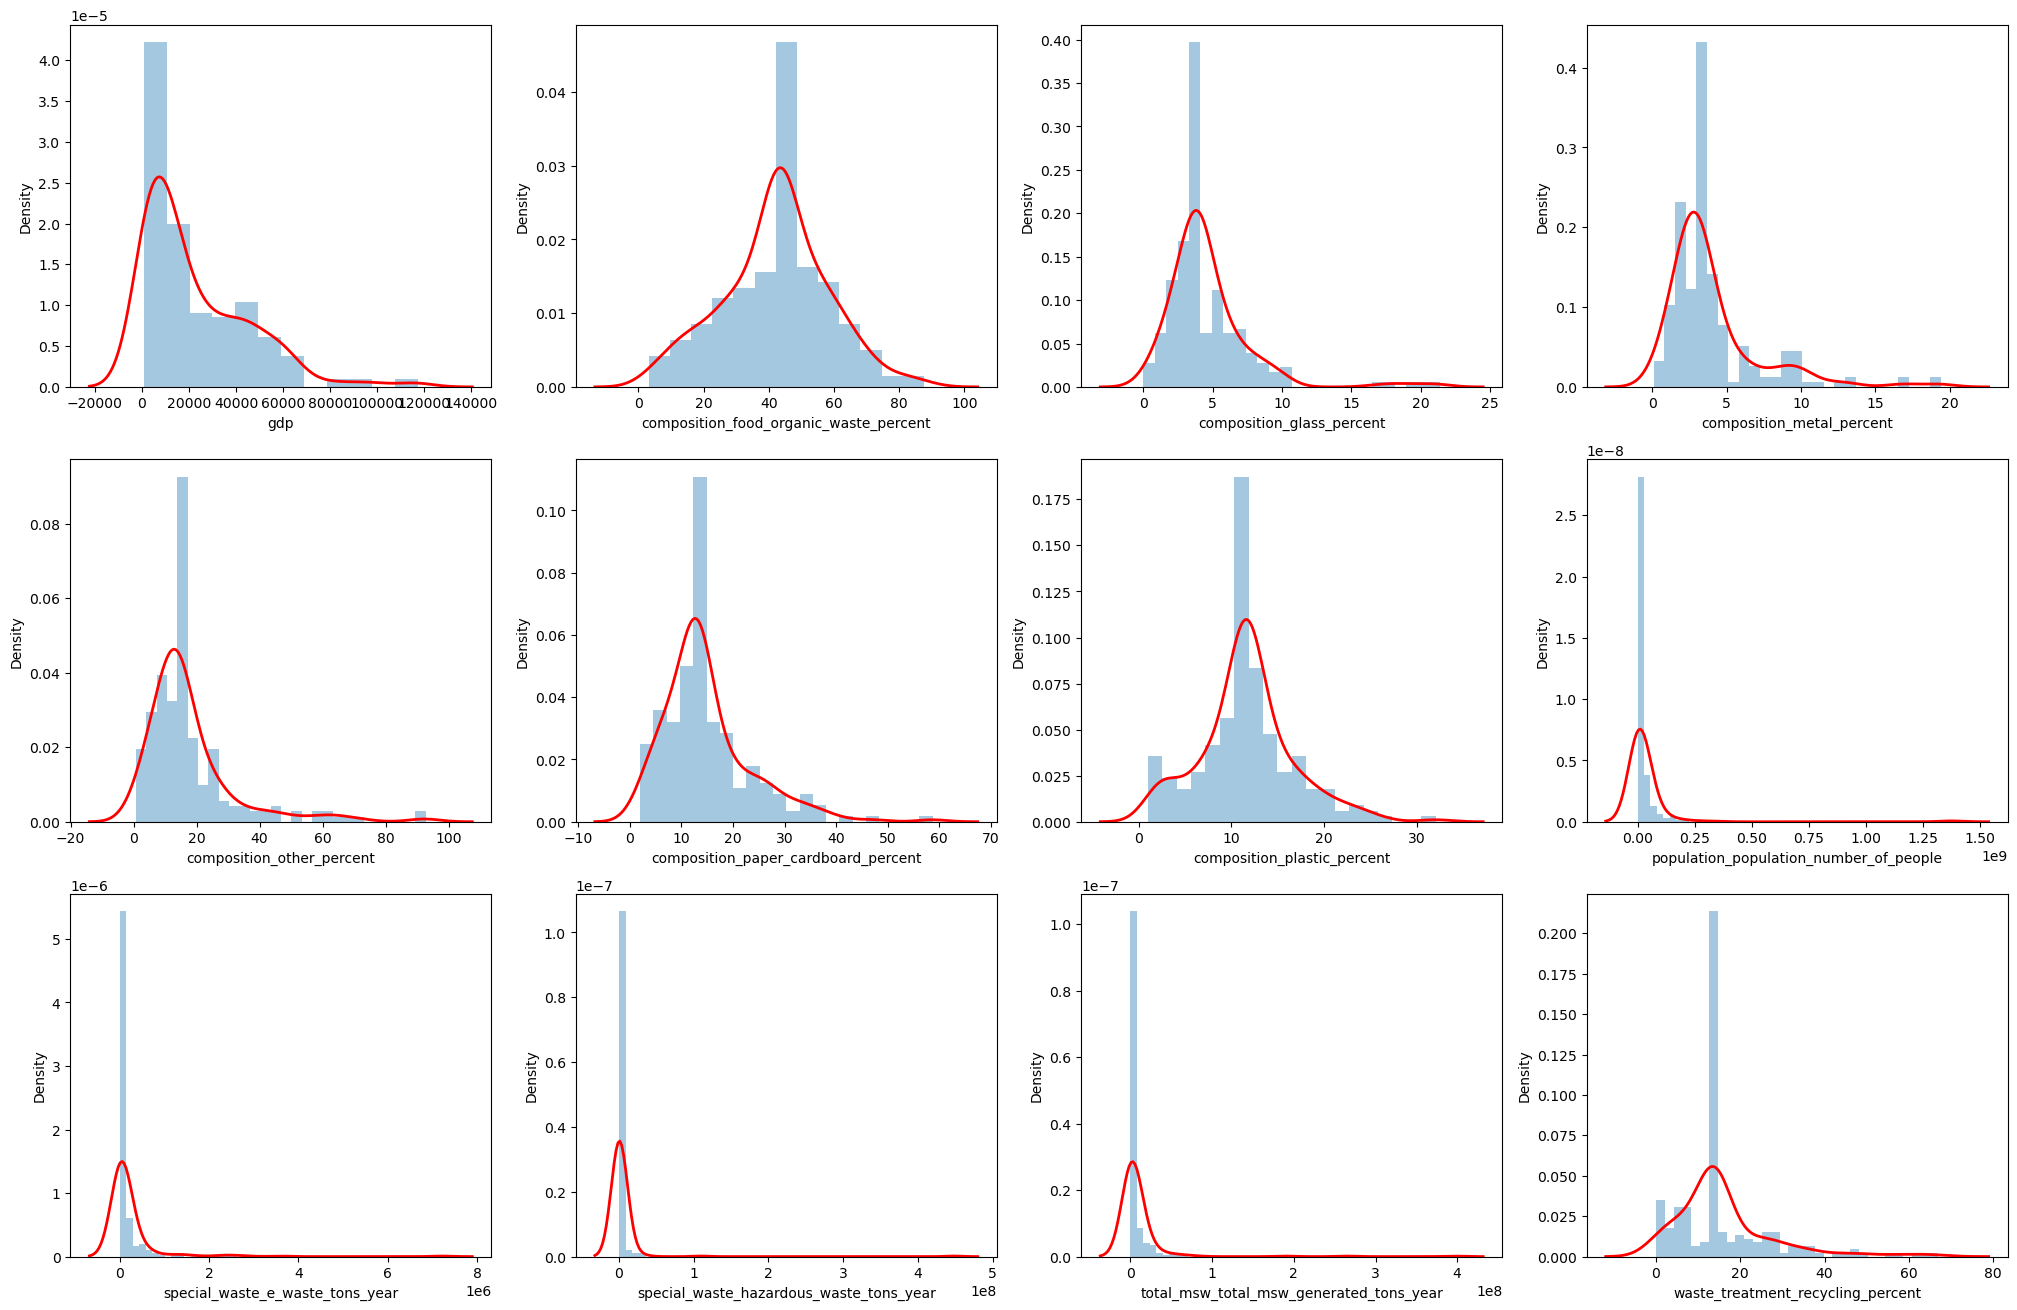

In [17]:
#Finding the distribution of numeric columns data in the dataframe 
plt.figure(figsize = (25,16))

for i,j in enumerate(df.select_dtypes(include = "number").columns):
    plt.subplot(3,4,i+1)
    sns.distplot(df[j], kde_kws = {"color":"red", "lw":2})
plt.show()

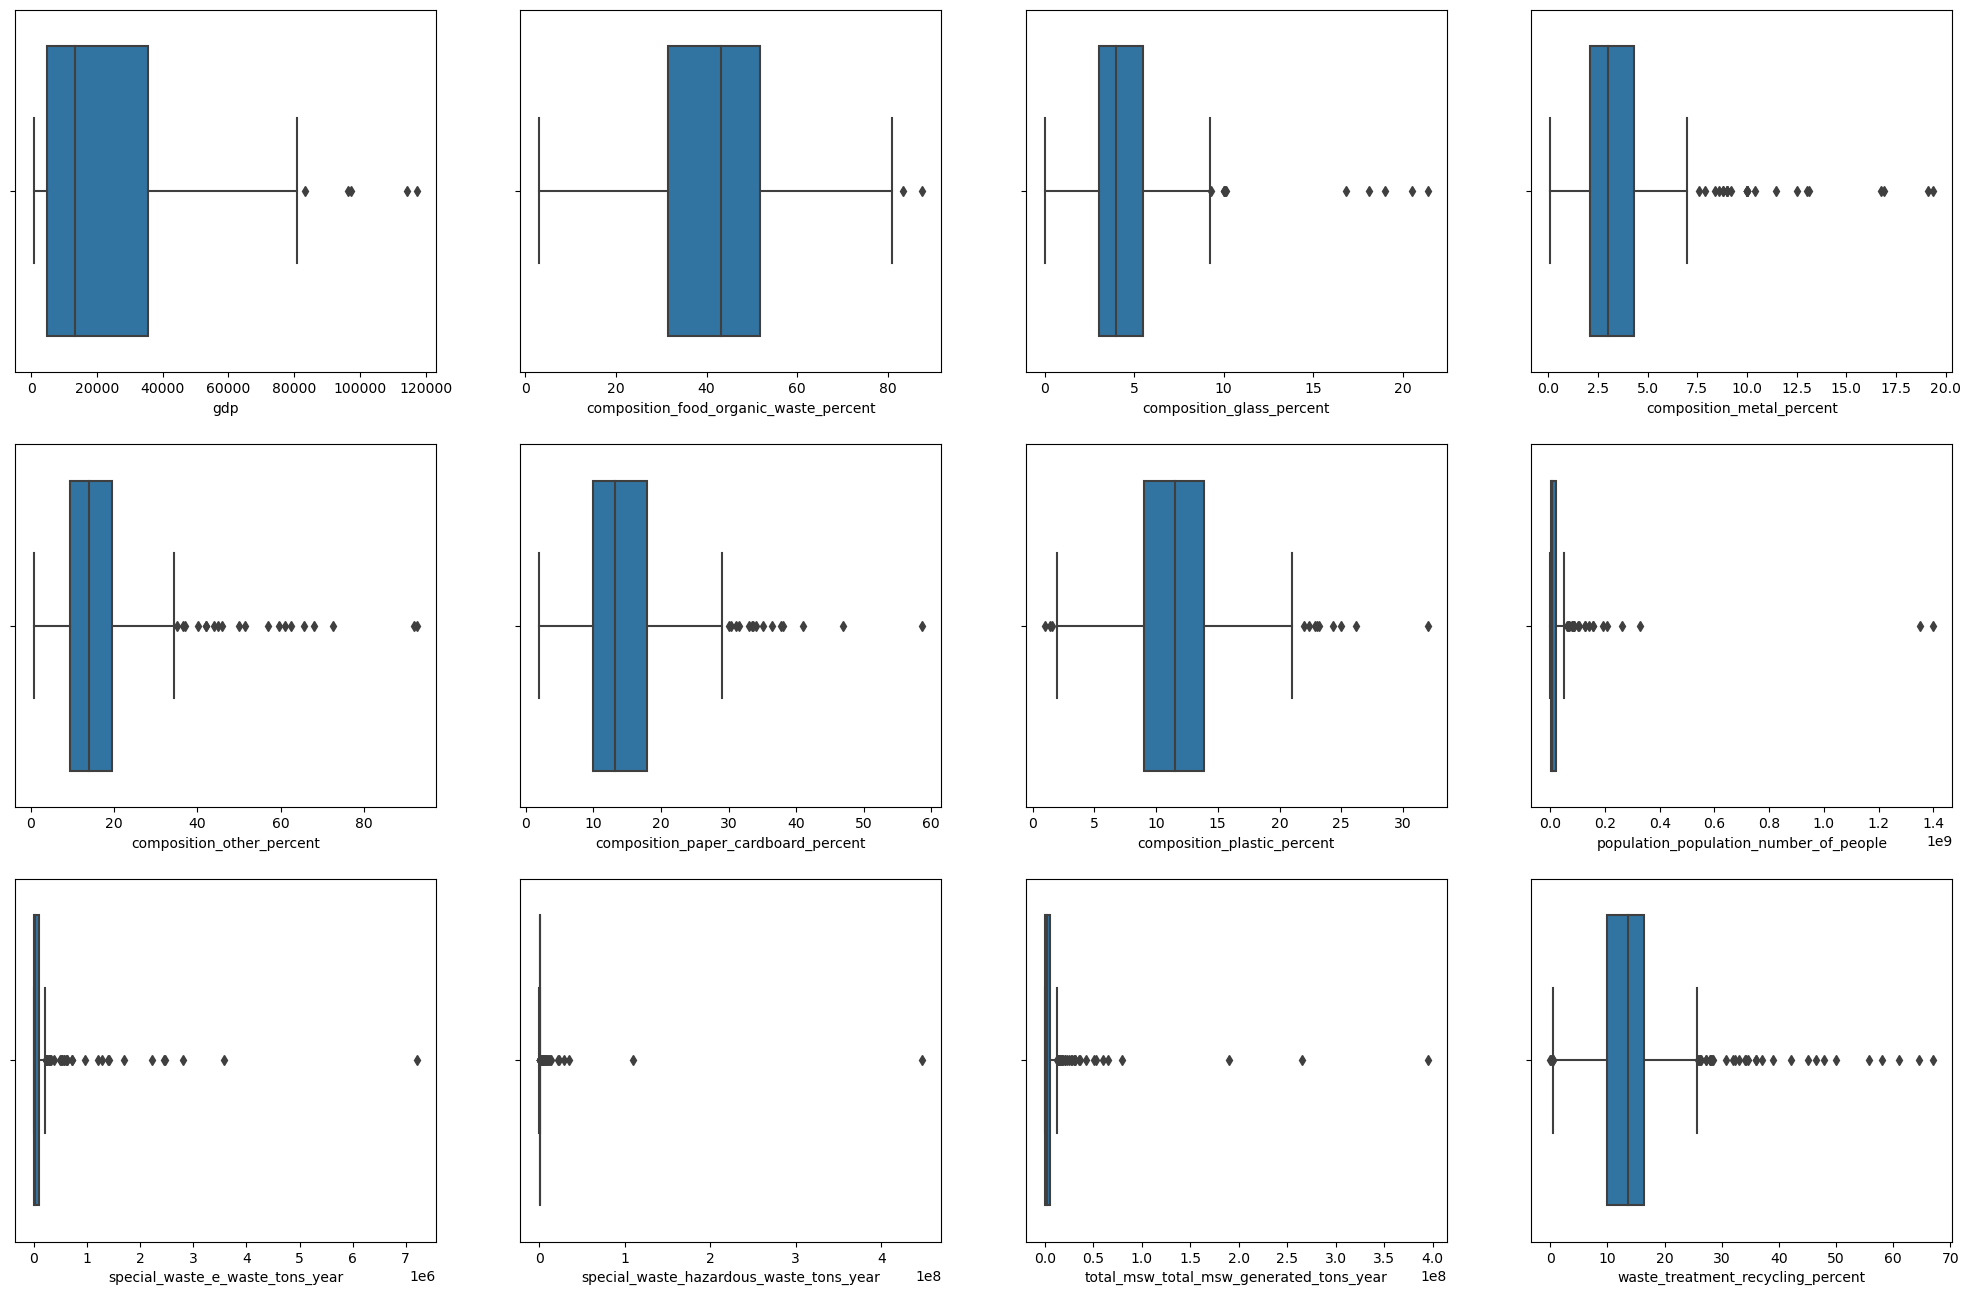

In [18]:
#Boxplot to identify the outliers

plt.figure(figsize = (25,16))

for i,j in enumerate(df.select_dtypes(include = "number").columns):
    plt.subplot(3,4,i+1)
    sns.boxplot(df[j])
    plt.xlabel("{}".format(j))
plt.show()

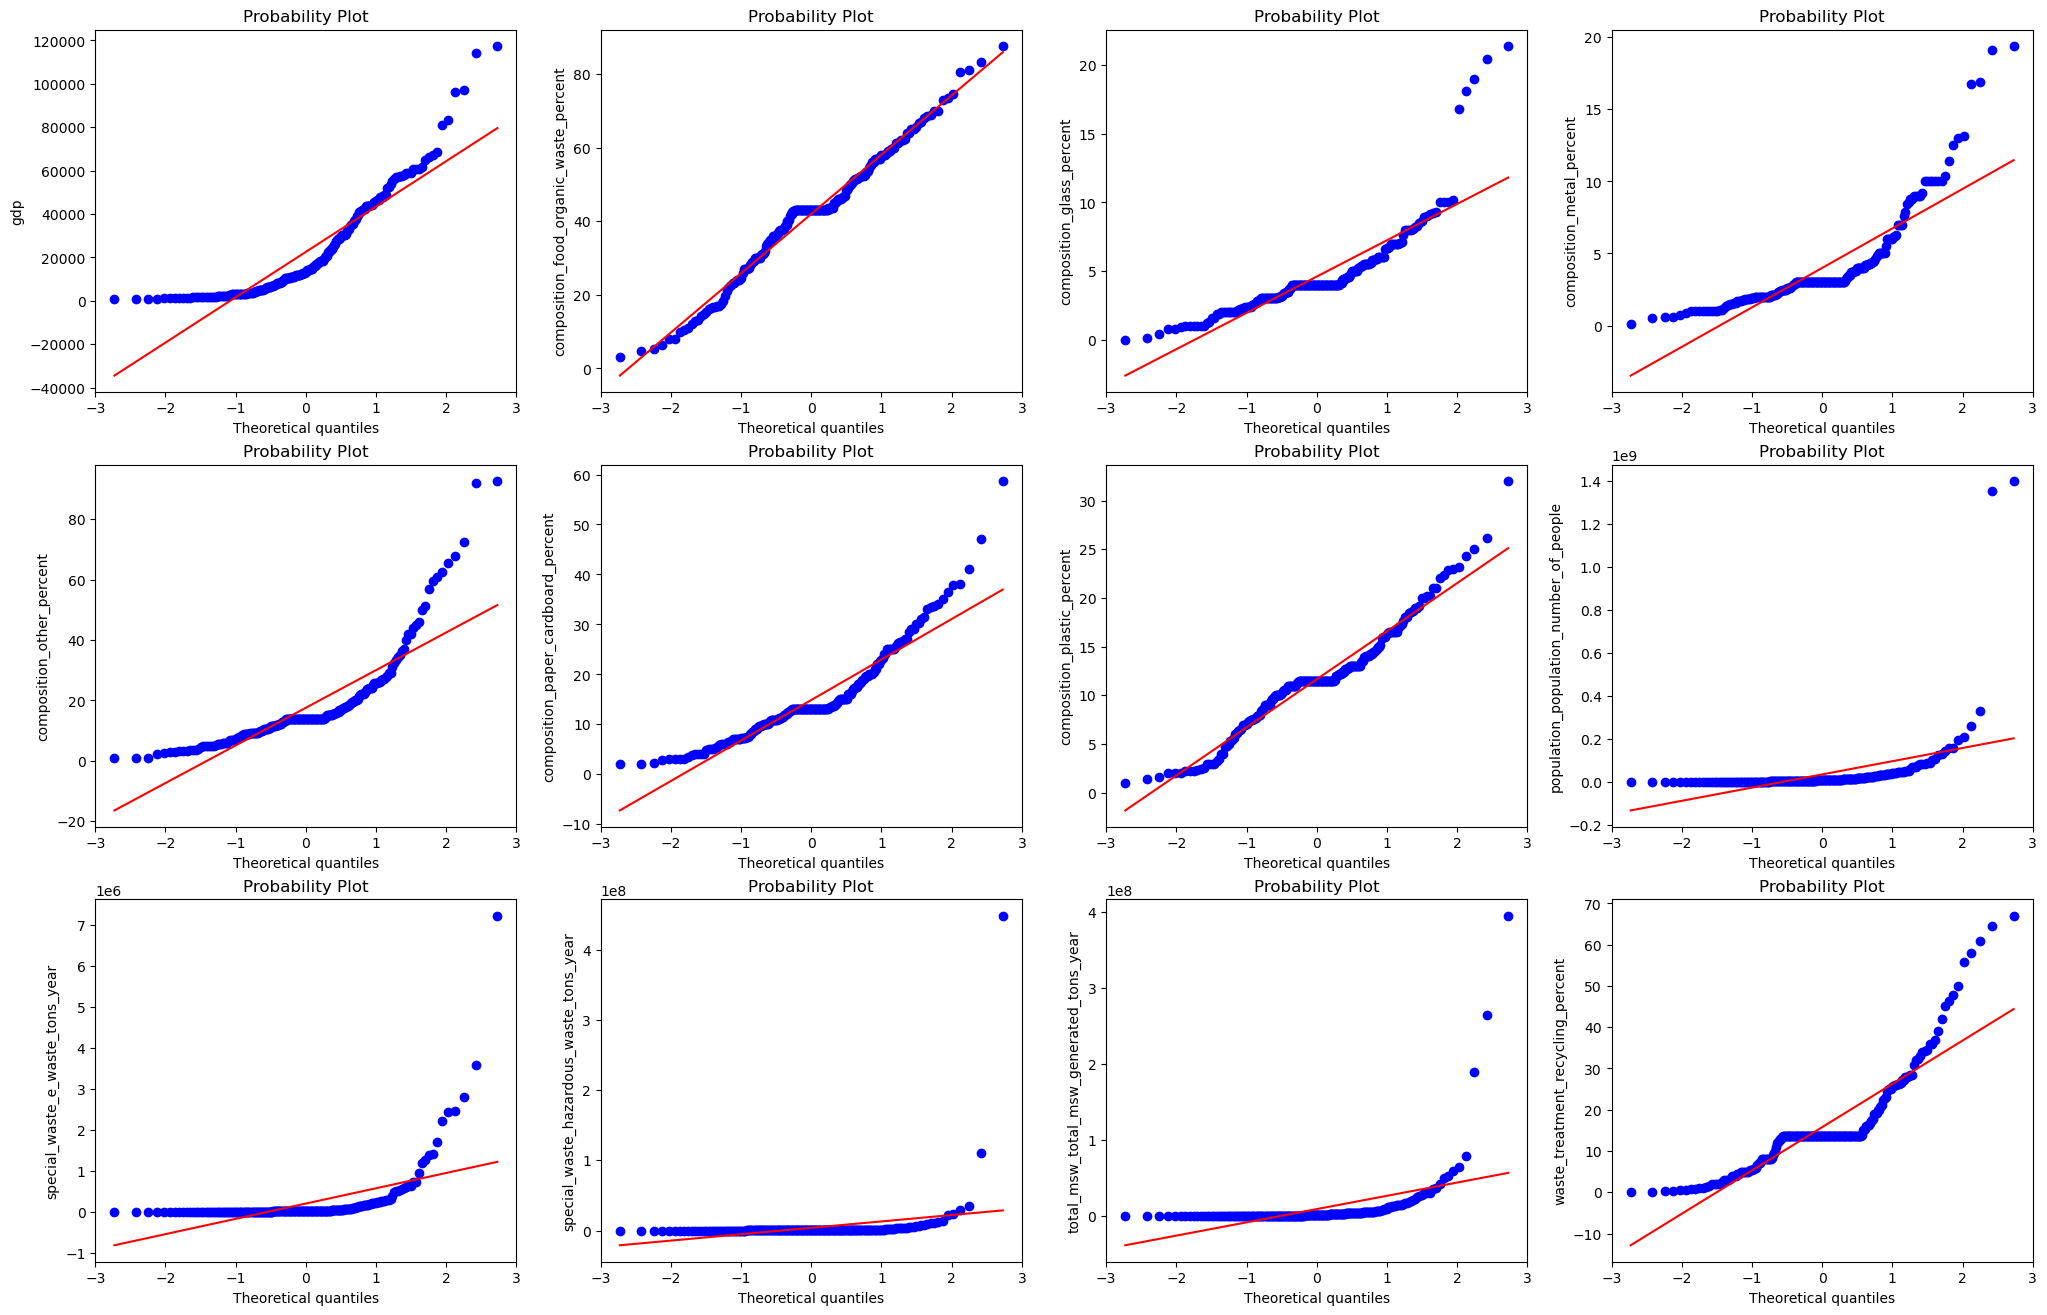

In [19]:
#Finding the normal distribution of the data (numeric) in the dataframe
plt.figure(figsize = (25,16))

for i,j in enumerate(df.select_dtypes(include = "number").columns):
    plt.subplot(3,4,i+1)
    stats.probplot(df[j], dist = "norm", plot = plt)
    plt.ylabel("{}".format(j))

plt.show()

## Note:
Outliers are not removed in this data set because it is related to pollution and there might be possibility of such high values and so those values are considered for analysis. Most outliers are related to China and India, It is evident that these countries are the most popuplated country. Hence it cannot be considered as Outlier.

# Questions:
1. Which countries producing the most composition_food_organic_waste_percent
2. Which countries producing the most composition_glass_percent
3. Which countries producing the most composition_metal_percent
4. Which countries producing the most composition_other_percent
5. Which countries producing the most composition_paper_cardboard_percent
6. Which countries producing the most composition_plastic_percent',
7. Which countries having the most population_population_number_of_people',
8. Which countries producing the most special_waste_e_waste_tons_year',
9. Which countries producing the most special_waste_hazardous_waste_tons_year',
10. Which countries producing the most total_msw_total_msw_generated_tons_year',
11. Which countries having the most waste_treatment_recycling_percent


In [167]:
df_max=pd.DataFrame()
result1=[]
result2=[]
result3=[]
for i in enumerate(df[['composition_food_organic_waste_percent',
                        'composition_glass_percent',
                        'composition_metal_percent',
                        'composition_other_percent',
                        'composition_paper_cardboard_percent',
                        'composition_plastic_percent',
                        'population_population_number_of_people',
                        'special_waste_e_waste_tons_year',
                        'special_waste_hazardous_waste_tons_year',
                        'total_msw_total_msw_generated_tons_year',
                        'waste_treatment_recycling_percent']]):
    result1.append(i[1])
    result2.append(df[df[i[1]]==max(df[i[1]])]['country_name'].to_string(index=False))
    result3.append(df[df[i[1]]==max(df[i[1]])]['waste_treatment_recycling_percent'].to_string(index=False))
df_max['Category']=result1
df_max['Country']= result2
df_max['Waste recycling percent']= result3
display(df_max)

,Category,Country,Waste recycling percent
0,composition_food_organic_waste_percent,Ethiopia,13.655
1,composition_glass_percent,Latvia,21.23
2,composition_metal_percent,Australia,42.1
3,composition_other_percent,Bosnia and Herzegovina,0.00097
4,composition_paper_cardboard_percent,"Macao SAR, China",20.0
5,composition_plastic_percent,Palau,13.655
6,population_population_number_of_people,China,13.655
7,special_waste_e_waste_tons_year,China,13.655
8,special_waste_hazardous_waste_tons_year,Ukraine,3.2
9,total_msw_total_msw_generated_tons_year,China,13.655
